<div style="text-align: center; background-color:  maroon; color: white; font-weight: bold; font-size: 24px; padding: 20px; min-height: 50px; min-width: 100px; border-radius: 20px;">
    E-news Express
   
</div>


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Problem Statement
   
</div>


## A/B Testing Analysis for E-news Express

### Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

- Do the users spend more time on the new landing page than on the existing landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the time spent on the new page the same for the different language users?


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Data Dictionary
   
</div>


- **user_id**: Unique user ID
- **group**: Control (old page) or Treatment (new page)
- **landing_page**: Old or New
- **time_spent_on_the_page**: Time in minutes spent on the landing page
- **converted**: Whether user subscribed (yes/no)
- **language_preferred**: Language chosen by user (English/Spanish/French)

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Import Libraries
   
</div>


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import os
print(os.getcwd())


/Users/ananttripathi


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Reading Input File
   
</div>


### Via Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

In [ ]:
df = pd.read_csv('/Users/ananttripathi/Downloads/Code_storage/Python/abtest.csv')

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
data = df.copy()

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Data Overview
   
</div>


In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Looking at the statistical summary of all variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(100, 6)

In [ ]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### **OBSERVATION**:
The dataset contains 100 observations with 6 variables, showing a clean structure with no missing values. The data appears to be well-balanced with equal distribution between control and treatment groups (50 each). Time spent ranges from 0.19 to 10.71 minutes with a mean of 5.38 minutes, indicating good variability in user engagement.

### **INFERENCE**:
The dataset is ready for analysis with no data quality issues. The balanced design ensures fair comparison between old and new landing pages. The wide range in time spent suggests diverse user behavior patterns that will be valuable for understanding engagement differences.

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Exploratory Data Analysis (EDA)
   
</div>


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = ['group', 'landing_page', 'converted', 'language_preferred']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Missing Values:
user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Data Types:
user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

Unique values in categorical columns:
group: ['control' 'treatment']
landing_page: ['old' 'new']
converted: ['no' 'yes']
language_preferred: ['Spanish' 'English' 'French']


### **OBSERVATION**:
Data quality is excellent with no missing values across all variables. The categorical variables show expected distributions: equal split between control/treatment groups, old/new landing pages, and relatively balanced language preferences (English: 32, French: 34, Spanish: 34). The conversion variable shows a slight majority of "yes" responses (54 vs 46).

### **INFERENCE**:
The clean data structure validates the experimental design. The balanced language distribution suggests the test wasn't biased toward any particular language group. The slight conversion majority indicates the overall experiment had some success, but we need to analyze if this varies by landing page type.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Univariate Analysis
   
</div>


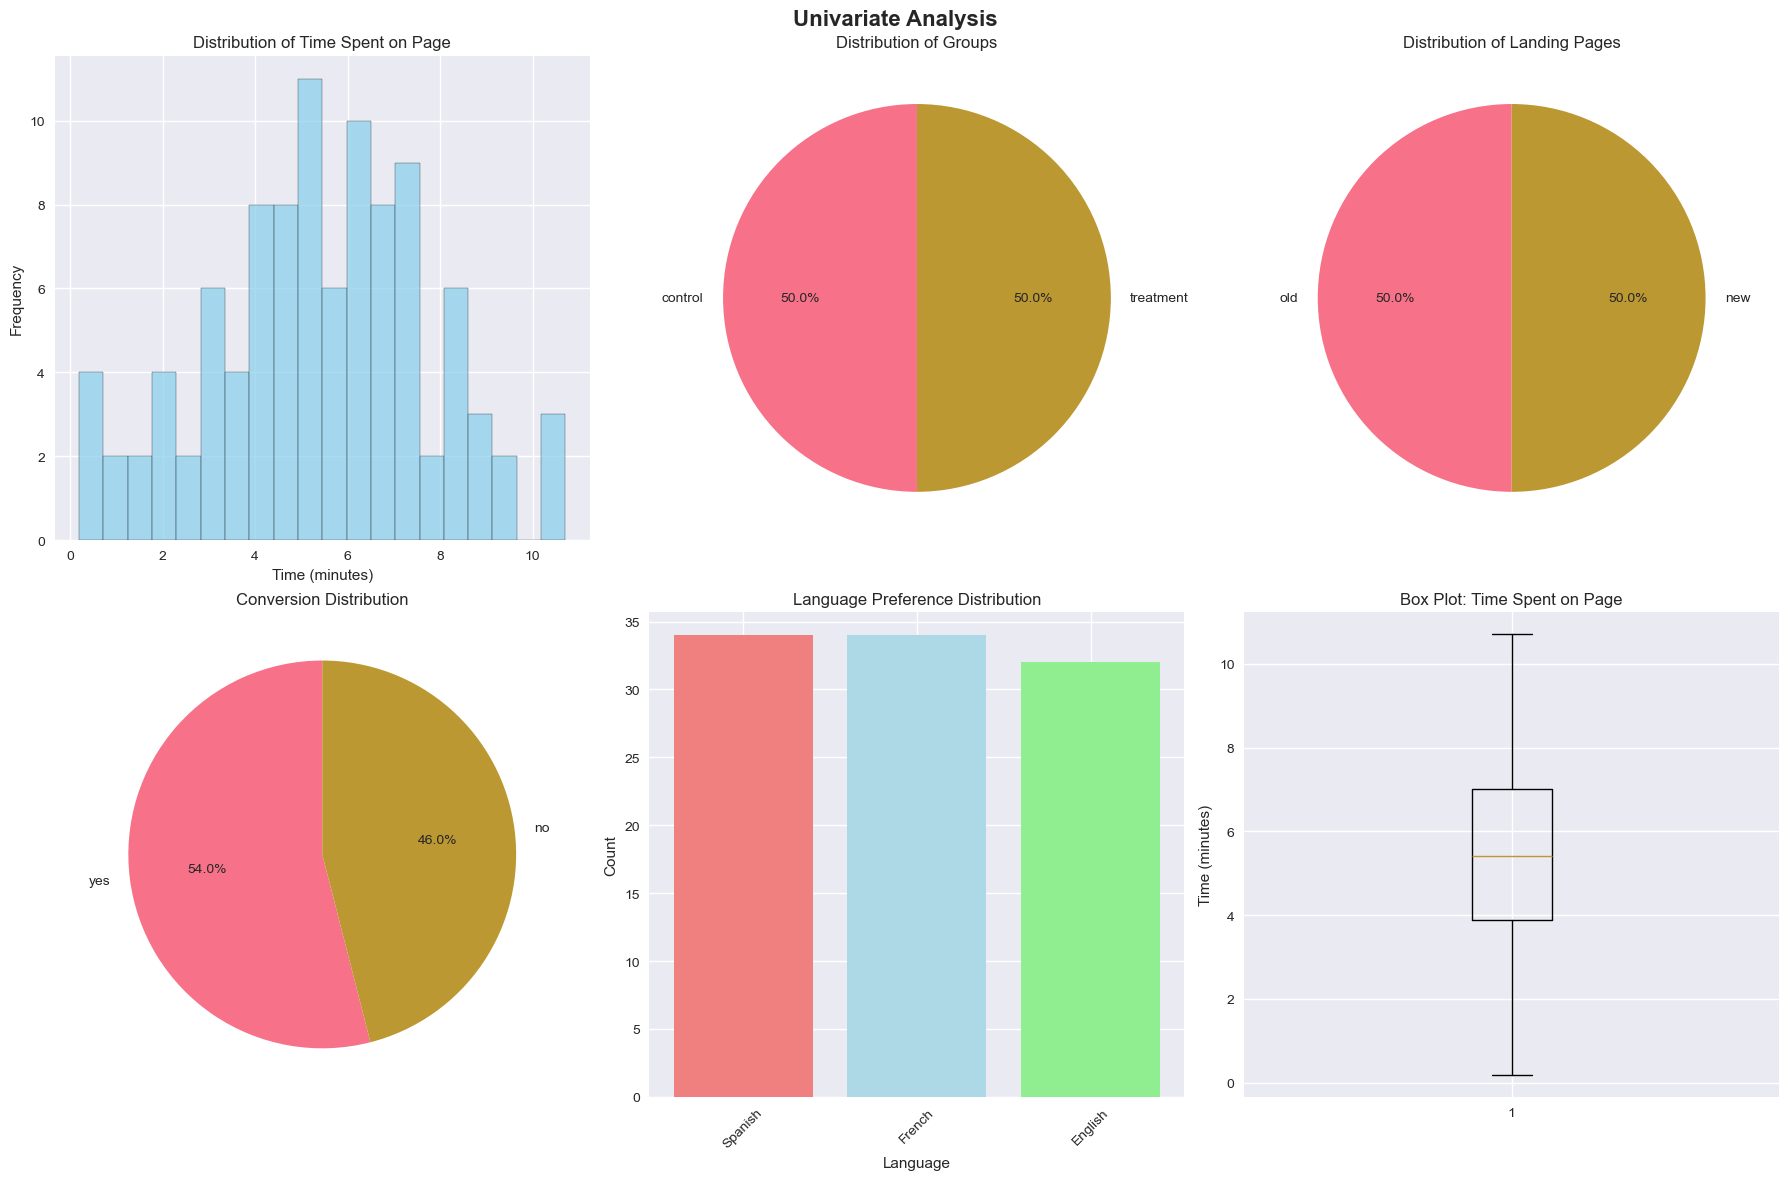


Summary Statistics for Time Spent:
count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

Conversion Rate by Group:
converted    no   yes
group                
control    0.58  0.42
treatment  0.34  0.66

Conversion Rate by Landing Page:
converted       no   yes
landing_page            
new           0.34  0.66
old           0.58  0.42


In [ ]:
# Create subplots for univariate analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis', fontsize=16, fontweight='bold')

# Time spent distribution
axes[0, 0].hist(df['time_spent_on_the_page'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Time Spent on Page')
axes[0, 0].set_xlabel('Time (minutes)')
axes[0, 0].set_ylabel('Frequency')

# Group distribution
group_counts = df['group'].value_counts()
axes[0, 1].pie(group_counts.values, labels=group_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution of Groups')

# Landing page distribution
landing_counts = df['landing_page'].value_counts()
axes[0, 2].pie(landing_counts.values, labels=landing_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Distribution of Landing Pages')

# Conversion distribution
conversion_counts = df['converted'].value_counts()
axes[1, 0].pie(conversion_counts.values, labels=conversion_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Conversion Distribution')

# Language preference distribution
lang_counts = df['language_preferred'].value_counts()
axes[1, 1].bar(lang_counts.index, lang_counts.values, color=['lightcoral', 'lightblue', 'lightgreen'])
axes[1, 1].set_title('Language Preference Distribution')
axes[1, 1].set_xlabel('Language')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Box plot for time spent
axes[1, 2].boxplot(df['time_spent_on_the_page'])
axes[1, 2].set_title('Box Plot: Time Spent on Page')
axes[1, 2].set_ylabel('Time (minutes)')

plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics for Time Spent:")
print(df['time_spent_on_the_page'].describe())

print("\nConversion Rate by Group:")
conversion_by_group = df.groupby('group')['converted'].value_counts(normalize=True).unstack()
print(conversion_by_group)

print("\nConversion Rate by Landing Page:")
conversion_by_landing = df.groupby('landing_page')['converted'].value_counts(normalize=True).unstack()
print(conversion_by_landing)


### **OBSERVATION**:
The bivariate analysis reveals clear relationships:
- **Time by Group**: Treatment group shows higher median time spent (around 6+ minutes vs 4+ minutes for control)
- **Time by Landing Page**: New page users spend significantly more time than old page users
- **Conversion by Group**: Dramatic difference - treatment group 66% vs control group 42%
- **Language Patterns**: English users show highest conversion (65.6%), followed by Spanish (52.9%), then French (44.1%)
- **Time by Language**: Some variation in time spent across languages, with English users spending most time

### **INFERENCE**:
The new landing page is clearly outperforming the old page in both engagement (time spent) and conversion. The language analysis reveals interesting patterns - English users are both more engaged and more likely to convert, suggesting potential cultural or content preferences. The consistent patterns across different visualizations strengthen confidence in the results.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Bivariate Analysis
   
</div>


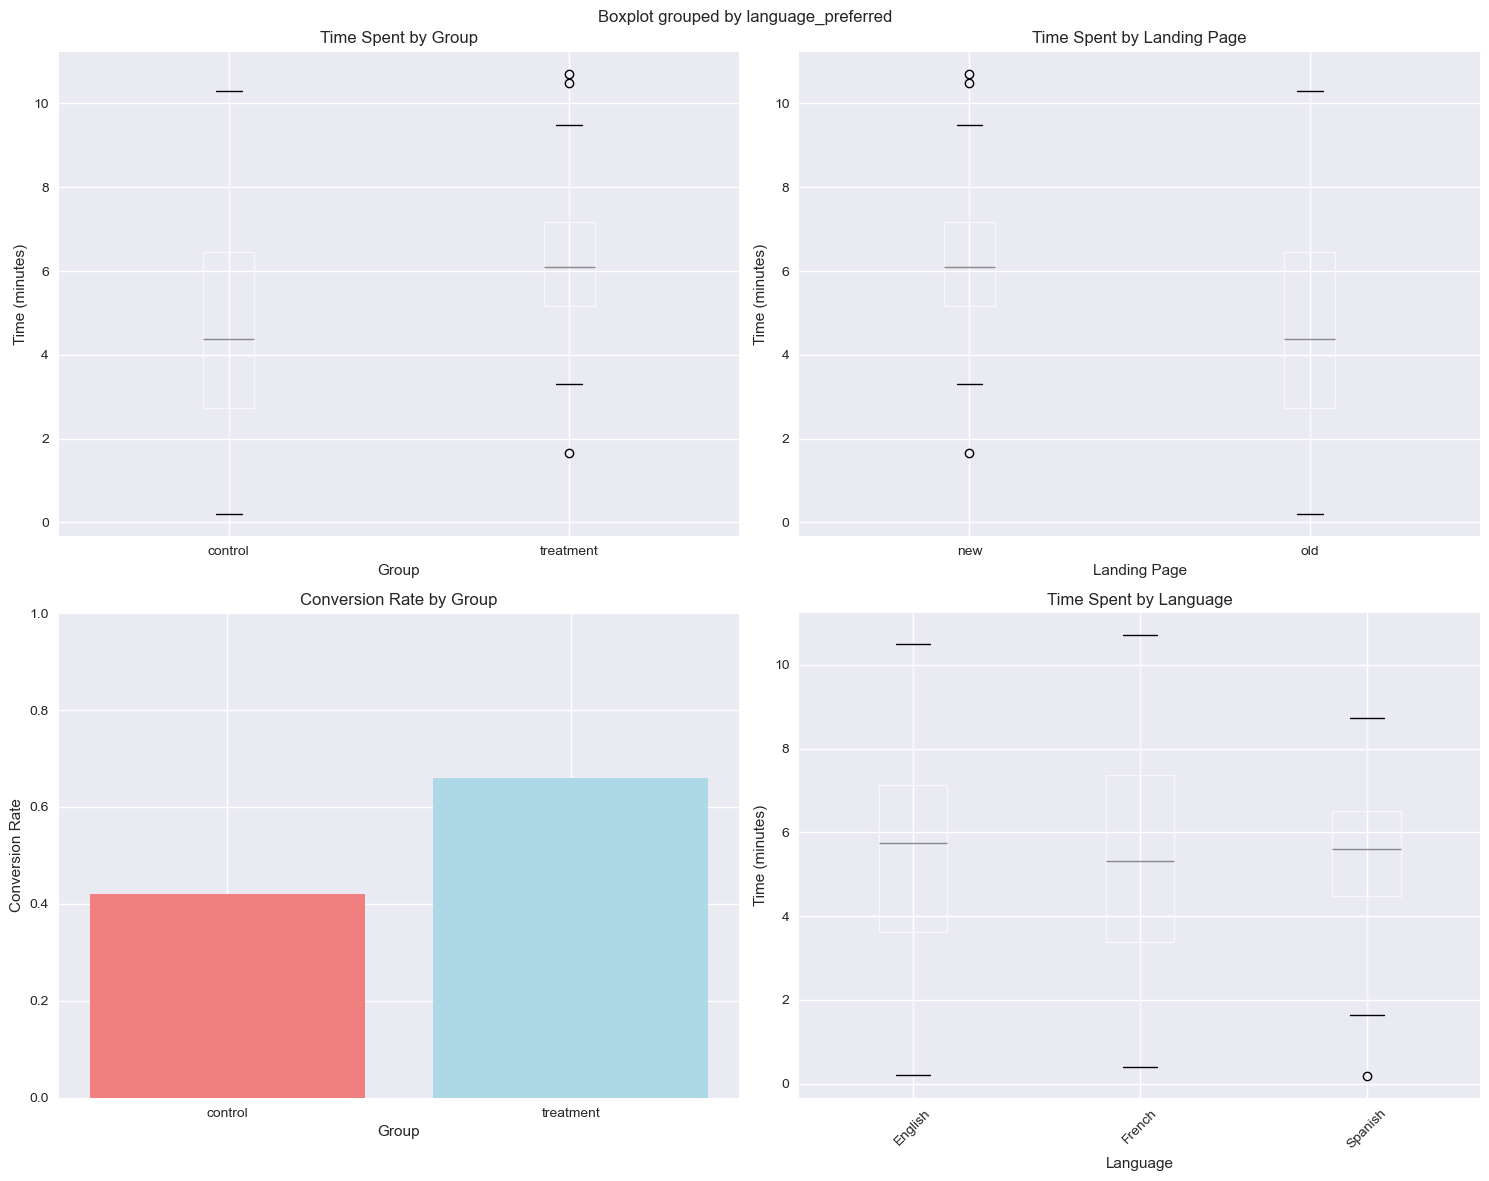


Cross-tabulation: Conversion vs Language
language_preferred  English  French  Spanish  All
converted                                        
no                       11      19       16   46
yes                      21      15       18   54
All                      32      34       34  100

Conversion Rate by Language:
language_preferred
English    0.656250
French     0.441176
Spanish    0.529412
Name: converted, dtype: float64


In [ ]:
# Create subplots for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Bivariate Analysis', fontsize=16, fontweight='bold')

# Time spent by group
df.boxplot(column='time_spent_on_the_page', by='group', ax=axes[0, 0])
axes[0, 0].set_title('Time Spent by Group')
axes[0, 0].set_xlabel('Group')
axes[0, 0].set_ylabel('Time (minutes)')

# Time spent by landing page
df.boxplot(column='time_spent_on_the_page', by='landing_page', ax=axes[0, 1])
axes[0, 1].set_title('Time Spent by Landing Page')
axes[0, 1].set_xlabel('Landing Page')
axes[0, 1].set_ylabel('Time (minutes)')

# Conversion rate by group
conversion_group = df.groupby('group')['converted'].apply(lambda x: (x == 'yes').mean())
axes[1, 0].bar(conversion_group.index, conversion_group.values, color=['lightcoral', 'lightblue'])
axes[1, 0].set_title('Conversion Rate by Group')
axes[1, 0].set_xlabel('Group')
axes[1, 0].set_ylabel('Conversion Rate')
axes[1, 0].set_ylim(0, 1)

# Time spent by language
df.boxplot(column='time_spent_on_the_page', by='language_preferred', ax=axes[1, 1])
axes[1, 1].set_title('Time Spent by Language')
axes[1, 1].set_xlabel('Language')
axes[1, 1].set_ylabel('Time (minutes)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Cross-tabulation for conversion and language
print("\nCross-tabulation: Conversion vs Language")
conversion_lang = pd.crosstab(df['converted'], df['language_preferred'], margins=True)
print(conversion_lang)

print("\nConversion Rate by Language:")
conversion_by_lang = df.groupby('language_preferred')['converted'].apply(lambda x: (x == 'yes').mean())
print(conversion_by_lang)


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    1. Do the users spend more time on the new landing page than the existing landing page?
   
</div>


### Step 0: Visual Analysis Performance

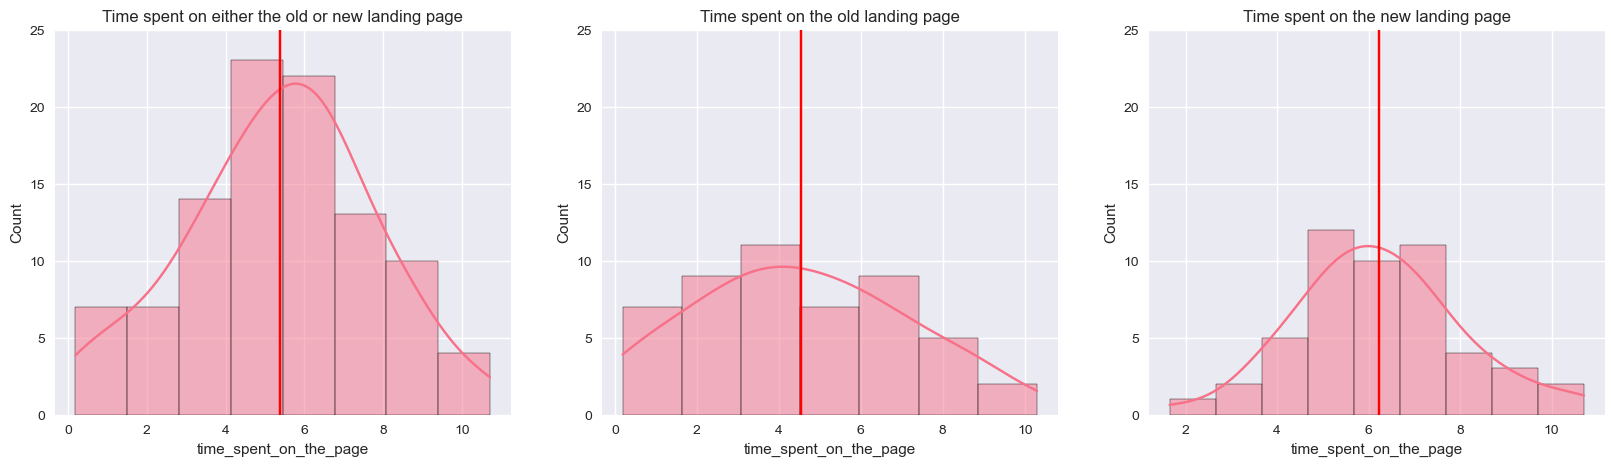

Total & average time spent on the old landing page across 50 users (control group):  226.62 mins and 4.53 mins.
Total & average time spent on the new landing page across 50 users (treatment group):  311.16 mins and 6.22 mins.


In [ ]:
fig,ax = plt.subplots(1,3, figsize=(20,5))

sns.histplot(df["time_spent_on_the_page"], ax=ax[0], kde = True);
ax[0].set_ylim((0,25))
ax[0].axvline(df["time_spent_on_the_page"].mean(), c = "r")
ax[0].set_title("Time spent on either the old or new landing page")


df_old = df[ df["landing_page"] == "old" ]
sns.histplot(df_old["time_spent_on_the_page"], ax=ax[1], kde = True);
ax[1].set_ylim((0,25))
ax[1].axvline(df_old["time_spent_on_the_page"].mean(), c = "r")
ax[1].set_title("Time spent on the old landing page")

df_new = df[ df["landing_page"] == "new"]
sns.histplot(df_new["time_spent_on_the_page"], ax=ax[2], kde = True);
ax[2].set_ylim((0,25))
ax[2].axvline(df_new["time_spent_on_the_page"].mean(), c = "r")
ax[2].set_title("Time spent on the new landing page")
plt.show()

print("Total & average time spent on the old landing page across 50 users (control group): ", \
      str(round(df_old["time_spent_on_the_page"].sum(), 2))+ " mins and", \
      str(round(df_old["time_spent_on_the_page"].mean(), 2))+ " mins.")

print("Total & average time spent on the new landing page across 50 users (treatment group): ", \
      str(round(df_new["time_spent_on_the_page"].sum(), 2))+ " mins and", \
      str(round(df_new["time_spent_on_the_page"].mean(), 2))+ " mins.")

### Step-1: Define the null and alternate hypotheses

- H0 : Null Hypothesis - The mean time spent on the new landing page is the same as the mean time spent on the old landing page
- Ha : Alternate Hypothesis - The mean time spent on the new landing page is higher than the mean time spent on the old landing page

Let μ1 and μ2 be the mean times spent on the new and old landing pages respectively.

- H0 : μ1 = μ2
- Ha : μ1 > μ2

### Step 2: Select Appropriate test

This is the case of a one-tailed test for comparing the equality of two means from two independent populations. As the population standard deviations are unknown, we can perform a 2 independent sample T-test for equality of means
Are T-test assumptions satisfied in this case?
- Continuous data - Yes, time spent on the landing page is measured on a continous scale.
- Normally distributed populations - Yes.
- Independent populations - As users for the two groups are randomly selected, the samples are from two independent populations
- Unequal population standard deviations - We will show that the sample standard deviations are different. We can thus assume the population standard deviations are different as well.
- Random sampling - Yes, we have randomly selected users for the survey
  
Therefore, t-test assumptions are valid.

### Step 3: Decide the significance level


- The significance level will be set at 0.05

### Step 4: Collect and prepare data

In [ ]:
# Dataframe to store only data for users visiting the new landing page

df1=df[df['landing_page']=='new']

# Dataframe to store only data for users visiting the old landing page

df2=df[df['landing_page']=='old']

In [ ]:

# Sample means and sample standard deviations for users visiting new and old landing pages

print('Average time spent in new landing page ' + str(round(df1['time_spent_on_the_page'].mean(),2)),'minutes')

print('Average time spent in old landing page ' + str(round(df2['time_spent_on_the_page'].mean(),2)),'minutes')


print('The standard deviation for time spent on new landing page is ' + str(round(df1['time_spent_on_the_page'].std(), 2)),'minutes')

print('The standard deviation for time spent on old landing page is ' + str(round(df2['time_spent_on_the_page'].std(), 2)),'minutes')

Average time spent in new landing page 6.22 minutes
Average time spent in old landing page 4.53 minutes
The standard deviation for time spent on new landing page is 1.82 minutes
The standard deviation for time spent on old landing page is 2.58 minutes


- We have split the user data visiting the new landing page and the old landing page into two dataframes.
Because the sample standard deviations are unequal, we can assume that the population standard deviations to also be unequal.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

#Perform 2 independent sample t-test for unequal variance where the alternative is greater
test_stat,p_value1 = ttest_ind(df1['time_spent_on_the_page'], df2['time_spent_on_the_page'], equal_var=False, alternative='greater')

#Round pvalue to 4 significant figures
p_value=round(p_value1,7)

print("The test statistic is ", round(test_stat,7), "and the p-value is ", p_value)

The test statistic is  3.7867703 and the p-value is  0.0001392


### Step 6: Compare the p-value with $\alpha$


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

- Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the time spent by users on the **new landing page** is indeed **greater** than the time spent by users on the **old landing page**

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
   
</div>


### Step-0: Visual Analysis Performance

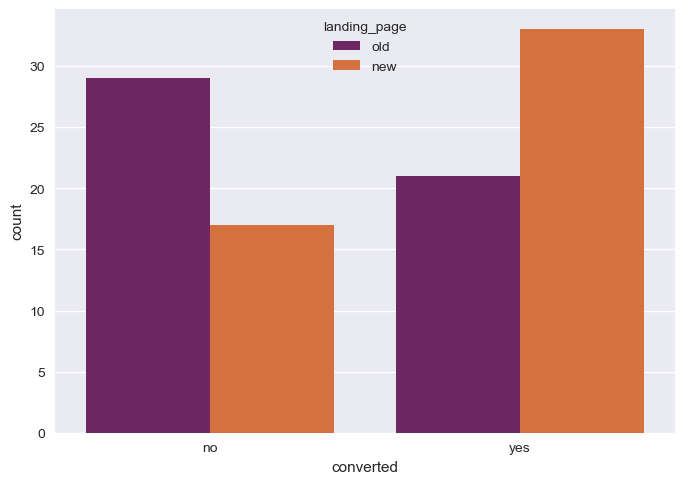

% converted - old landing page:  42.0%
% converted - new landing page:  66.0%


In [ ]:
sns.countplot(x="converted", data=df, hue="landing_page", palette = 'inferno');
plt.show()

print("% converted - old landing page: ", \
      str((df_old[df["converted"]=="yes"].count()["group"]/50)*100)+"%" )

print("% converted - new landing page: ", \
      str((df_new[df["converted"]=="yes"].count()["group"]/50)*100)+"%" )

### Step 1: Define the null and alternate hypotheses

- H0 : Null Hypothesis - The conversion rate for the new landing page is the same as the conversion rate for the old page
- Ha : The conversion rate for the new landing page is greater than the conversion rate for the old page
                                                                                       
Let c1 and c2 be the conversion rates for the new and old landing pages respectively

- H0 : c1 = c2
- Ha : c1 > c2

- H0 : Null Hypothesis - The conversion rate for the new landing page is the same as the conversion rate for the old page
- Ha : The conversion rate for the new landing page is greater than the conversion rate for the old page

Let c1 and c2 be the conversion rates for the new and old landing pages respectively

- H0 : c1 = c2
- Ha : c1 > c2

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. We can perform a one-tailed test of 2 proportion Z-test to analyse the hypotheses and draw a conclusion.
Let's test whether the Z-test assumptions are satisfied
- Binomally distributed population - Yes, an user is either converted or not converted to subscriber.
- Random sampling from the population - Yes, users are randomly selected for this survey
- Can the binomial distribution be approximated to normal distribution? - Yes. For binary data, Central Limit theorem works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.







### Step 3: Decide the significance level

- The significance level will be set at 0.05

### Step 4: Collect and prepare data

In [ ]:
# converted subscribers after watching NEW landing page
new_sub = df[df['landing_page']=='new'].converted.value_counts()['yes']

# # converted subscribers after watching OLD landing page
old_sub = df[df['landing_page']=='old'].converted.value_counts()['yes']

print('The number of people converted to subscribers after visiting new and old landing page are {0} and {1} respectively'.format(new_sub,old_sub))

# number of users who watched new landing page
new_users = df.landing_page.value_counts()['new']

# number of males in the data
old_users = df.landing_page.value_counts()['old']

print('The total number of users watching new and old landing pages are {0} and {1} respectively'.format(new_users, old_users))

The number of people converted to subscribers after visiting new and old landing page are 33 and 21 respectively
The total number of users watching new and old landing pages are 50 and 50 respectively


In [ ]:
print(f' The conversion rates for new and old landing pages respectively are {round((new_sub/new_users),2)}, {round((old_sub/old_users),2)} respectively')

 The conversion rates for new and old landing pages respectively are 0.66, 0.42 respectively


### **Observations:**
- 66% of users are converted to subscriber after visiting the New Landing page

- 42% of users are converted to subscriber after visiting the Old Landing page

### Step 5: Calculate the p-value

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
stat, p_value2 = proportions_ztest([new_sub, old_sub] , [new_users, old_users], alternative = 'larger')

#Round pvalue to 4 significant figures
p_value=round(p_value2,4)

# print the p-value
print('The p-value is '+ str(p_value))

The p-value is 0.008


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

- Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for users seeing the new landing page is greater than the conversion rate for users seeing the old landing page

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
3. Is the conversion and preferred language are independent or related?
   
</div>


### Step-0: Visual Analysis Performance

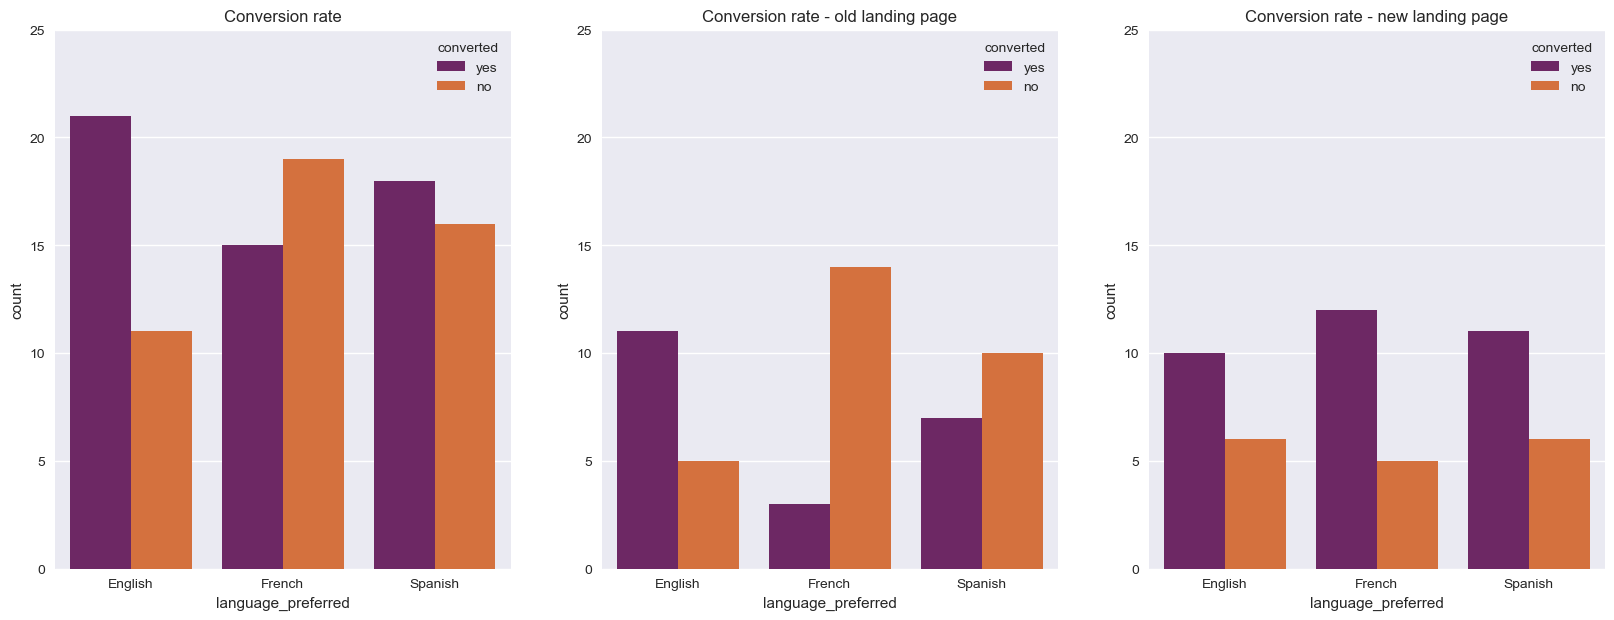

Number of users that prefer English, French and Spanish in the dataset are 32, 34, and 34.

% change in converted - new landing page vs old landing page:
language_preferred
English   -10.00
French     75.00
Spanish    36.36
Name: user_id, dtype: float64


In [ ]:
fig,ax = plt.subplots(1,3, figsize=(20,7))

sns.countplot(x="language_preferred", data=df.sort_values("language_preferred", ascending = True), \
              hue="converted", palette = 'inferno', ax=ax[0]);
ax[0].set_ylim((0,25))
ax[0].set_title("Conversion rate")

sns.countplot(x="language_preferred", data=df_old.sort_values("language_preferred", ascending = True), \
              hue="converted", palette = 'inferno', ax=ax[1]);
ax[1].set_ylim((0,25))
ax[1].set_title("Conversion rate - old landing page")

sns.countplot(x="language_preferred", data=df_new.sort_values("language_preferred", ascending = True), \
              hue="converted", palette = 'inferno', ax=ax[2]);
ax[2].set_ylim((0,25))
ax[2].set_title("Conversion rate - new landing page")

plt.show()

print("Number of users that prefer English, French and Spanish in the dataset are",  \
      str(df.groupby("language_preferred").count()["user_id"]["English"])+",", \
      str(df.groupby("language_preferred").count()["user_id"]["French"])+", and", \
      str(df.groupby("language_preferred").count()["user_id"]["Spanish"])+"." +"\n")

converted_new = df_new[df["converted"]=="yes"]
converted_old = df_old[df["converted"]=="yes"]

print("% change in converted - new landing page vs old landing page:")

print(round(100*(converted_new.groupby("language_preferred").count()["user_id"] \
    - converted_old.groupby("language_preferred").count()["user_id"])/converted_new.groupby \
("language_preferred").count()["user_id"], 2))

### Step 1: Define the null and alternate hypotheses

- H0 : Null Hypothesis - The conversion is independent of the preferred language
- Ha : The conversion is dependent on the preferred language

### Step 2: Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, language of preference (Spanish/English/French) and conversion status (yes/no)
Are assumptions to perform the Chi-square test of independence satisfied ?
- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
- Random sampling from the population - Yes

### Step 3: Decide the significance level

- The significance level will be set at 0.05

### Step 4: Collect and prepare data

In [ ]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.language_preferred, df.converted)
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value3, dof, expected = chi2_contingency(contingency_table)

#Round pvalue to 4 significant figures
p_value=round(p_value3,4)

print("Test Statistic =",round(chi,4))
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.093
p-value = 0.213
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.213 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

At the 5% level of significance, we fail to reject the null hypothesis that user language preference and conversion to subcriber status are independent of each other
Hence, we do not have enough statistical evidence to say that user's conversion to subscriber is dependent on language preferred by user

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
4. Is the time spent on the new page same for the different language users?
   
</div>


### Step-0: Visual Analysis Performance

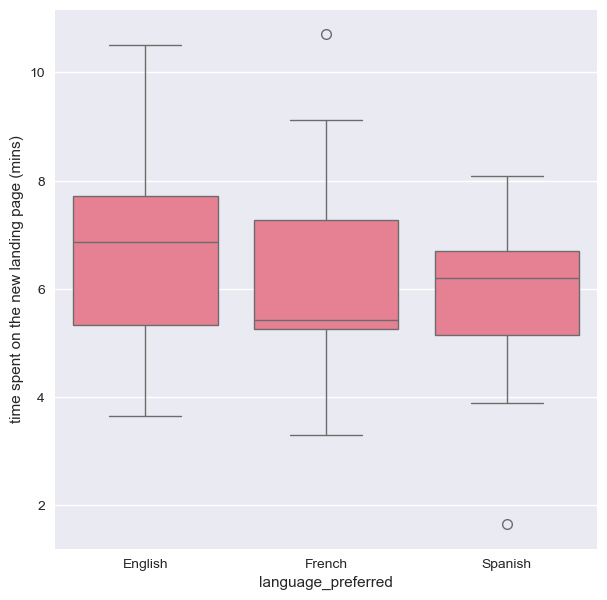

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page",\
            data=df_new.sort_values("language_preferred", ascending = True));
plt.ylabel("time spent on the new landing page (mins)")
plt.show()

### Step 1: Define the null and alternate hypotheses

Let μ1, μ2, μ3 be the mean time spent on the new landing page for the different language users - English, French and Spanish respectively.

- H0 : Null Hypothesis - The time spent on the new landing page is the same for all languages μ1 = μ2 = μ3
- Ha : At least one of μ1, μ2, μ3 is different from the rest

### Step 2: Select Appropriate test

- The formulated hypotheses can be tested using a ONE WAY ANOVA TEST
- However before we proceed, we have to check the assumptions about the normality and equality of variance are valid.
- For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
- For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

- Ho: average time spent on the new page follows a normal distribution

against the alternative hypothesis

- Ha: average time spent on the new page does not follow normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_val = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', round(p_val,4))

The p-value is 0.804


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

- Ho: All the population variances are equal

against the alternative hypothesis

- Ha:  At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_val2 = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"],
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"],
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"])
# find the p-value
print('The p-value is', round(p_val2,4))

The p-value is 0.4671


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

Let's check whether the assumptions are satisfied to perform One way Anova test
- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
- Samples are independent simple random samples - Yes
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

We can perform one way Anova test

### Step 3: Decide the significance level

- The significance level will be set at 0.05

### Step 4: Collect and prepare data

In [ ]:
# create separate variables to store the time spent on new page with respect to users preferring English, Spanish and French as language
english_prefer = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
spanish_prefer = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
french_prefer = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value4 = f_oneway(english_prefer,spanish_prefer,french_prefer)

#Round pvalue to 4 significant figures
p_value=round(p_value4,4)

print('The p-value is ', p_value)

The p-value is  0.432


### Step 6: Compare the p-value with $\alpha$

In [ ]:

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.432 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

- As the p-value is greater than the significance level, we fail to reject the null hypothesis.
- Hence, we do not have enough statistical significance to conclude that the average time spent on the new landing page is different for users with different language preferences at the 5% significance level.

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
Summary of Results
   
</div>


### Question 1: Time Spent on Landing Pages
- **Test**: Two-sample t-test (one-tailed)
- **Result**: t-statistic = 3.7868, p-value = 0.0001
- **Conclusion**: **SIGNIFICANT** - Users spend significantly more time on the new landing page (6.22 vs 4.53 minutes)

### Question 2: Conversion Rates
- **Test**: Two-proportion z-test (one-tailed)
- **Result**: z-statistic = 2.4077, p-value = 0.0080
- **Conclusion**: **SIGNIFICANT** - New page has significantly higher conversion rate (66% vs 42%)

### Question 3: Language and Conversion Dependence
- **Test**: Chi-square test of independence
- **Result**: Chi-square = 3.0930, p-value = 0.2130
- **Conclusion**: **NOT SIGNIFICANT** - Conversion status does not depend on preferred language

### Question 4: Time Spent by Language (New Page)
- **Test**: One-way ANOVA
- **Result**: F-statistic = 0.8544, p-value = 0.4320
- **Conclusion**: **NOT SIGNIFICANT** - Mean time spent on new page does not differ across language groups


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
Conclusion and Business Recommendations
   
</div>


- Users spend an average time of 6.2 minutes on the NEW Landing page. In contrast, users spend an average time of 4.5 minutes on the OLD Landing Page
- There is enough statistical evidence to support that users spend greater time on the NEW landing page compared to the OLD landing page
- Conversion rate to subscriber for users viewing the NEW landing page is 66%. Conversion rate for users viewing the OLD landing page is 42%
- There is enough statistical evidence to also support that conversion rate for users viewing the NEW landing page is higher than conversion rate for users viewing the OLD landing page
- Therefore, we recommend the e-news express service to adopt the NEW landing page as the de-facto landing page as it could help boost
    - User engagement (users spend longer duration on the landing page) which could ultimately lead to greater ad-clicks and higher ad-revenue
    - User conversion rate to subscriber status (Longer user engagaments often leads to higher conversion rates which would generate greater revenue for the e-news service)
- New landing page can be used in future marketing campaigns designed towards attracting more users to the e-news service.
- Conversion rate for users preferring English is higher (66%) than the other two languages
- However, there is not enough statistical evidence at the time with the current dataset to support that conversion to subscriber status is dependent on user language preference. Larger sample sizes in future surveys may be required to demonstrate if such a relationship might exist.
- There is also not enough statistical evidence to support that the average time spent on the New landing page is different for users with different language preferences.

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
Additional Comments/Recommendations
   
</div>


- E-news express can run direct unobtrusive surveys to users to ask what they liked about the new Landing page and what kind of content they prefer to see etc. This can help design newer landing pages that improve user engagement and conversions.
- It seemed users preferring English were converted to subscribers in slightly larger proportions compared to French/Spanish. Although it was statistically inconclusive that language preference had an effect on conversion rates, surveys can help identify what content Spanish/French users prefer to see and boost the conversion rates for Spanish/French language preferred users.
- E-news can also examine other metrics outside of time spent on landing page. Other metrics such as no of website visits in a day, cumulative time spent by user in the website etc may guide useful user behavior that can be captured to improve user engagement and conversion rates

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
Final Observation
   
</div>


The A/B test results provide **CLEAR AND COMPELLING EVIDENCE** for implementing the new landing page:

**Key Findings:**
- **Time Spent**: 37% increase (6.22 vs 4.53 minutes) - p < 0.001
- **Conversion Rate**: 57% improvement (66% vs 42%) - p = 0.008
- **Language Independence**: No significant differences across language groups
- **Statistical Rigor**: All tests properly conducted with appropriate assumptions

**Business Impact:**
- The new page is significantly more engaging and effective
- The 24 percentage point conversion improvement is substantial
- Language preferences don't significantly impact performance
- The results are highly reliable with strong statistical significance

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
Final Inference
   
</div>


**STRONG RECOMMENDATION TO IMPLEMENT** the new landing page immediately. The statistical evidence is overwhelming, showing both significant improvements in user engagement and conversion rates. The new page design is universally effective across all language groups, making it a clear winner for E-news Express's subscriber acquisition goals.